<a href="https://colab.research.google.com/github/alinagai/forecasting-power-outages/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%93%D0%B0%D0%B9%D0%BD%D1%83%D0%BB%D0%BB%D0%B8%D0%BD%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# создаем датасет
df = pd.read_csv('electricity.csv',sep=';')
df.head()

,Substation_name,Volt,Num,Locality,Month_outage,Temperature,Wind_speed,Snow,Rain,Thunder,Outcome
0,Чинчурино,В Вл 110,0,Тетюши,январь,-8,4,0,0,0,0
1,Макулово,СВ 110,0,Макулово,январь,-9,4,0,0,0,0
2,Чинчурино,В Вл 110,0,Чинчурино,январь,-8,3,1,0,0,1
3,Макулово,СВ 110,0,Макулово,январь,-8,5,1,0,0,1
4,Красновидово,T-1,0,Красновидово,январь,-8,5,1,0,0,1


In [ ]:
df.isna().sum()

Substation_name    0
Volt               0
Num                0
Locality           0
Month_outage       0
Temperature        0
Wind_speed         0
Snow               0
Rain               0
Thunder            0
Outcome            0
dtype: int64

In [ ]:
unique_values = df["Substation_name"].unique()

# Печать уникальных значений
for value in unique_values:
    print(value)

Чинчурино
Макулово
Красновидово
М.Цильна
Апастово
Куралово
Чечкабы
Подберезье
Раково
Тарханы
Ямбухтино
Федоровская
Печищи
Бишбатман
Нурлаты
Кайбицы
Дрожжаное
Камское устье
Киять
Дружба
Восход
Тетюши
Майданы
Караталга
Ключищи
Каратун
Савино
Свияжск
Буинск
Бурнашево
Б.Акса
Западная
Матюшино
 Кайбицы
Рассвет
Ключи
Чечкабы 
Янгельдино
Бакырчи
Рудник
Фёдоровская
Ишеевка
Студенец
Нижний Услон
Подберезье 
Энтуганы
Камское Устье
Федорвская
Н.Услон
Малая Буинка
Исаково
 М.Цильна
М. Цильна
Верхний Услон
Интернат
Водокачка
Дуслык
Малая-Буинка
Камское устье 
Тат.Бурнашево


In [ ]:
df.loc[df["Substation_name"] == " Кайбицы", "Substation_name"] = "Кайбицы"
df.loc[df["Substation_name"] == "Кайбицы ", "Substation_name"] = "Кайбицы"

In [ ]:
df.loc[df["Substation_name"] == " М.Цильна", "Substation_name"] = "М.Цильна"
df.loc[df["Substation_name"] == " М. Цильна", "Substation_name"] = "М.Цильна"
df.loc[df["Substation_name"] == "М. Цильна", "Substation_name"] = "М.Цильна"
df.loc[df["Substation_name"] == "М.Цильна ", "Substation_name"] = "М.Цильна"
df.loc[df["Substation_name"] == "М. Цильна ", "Substation_name"] = "М.Цильна"

In [ ]:
df.loc[df["Substation_name"] == "Дуслык", "Substation_name"] = "Дружба"
df.loc[df["Substation_name"] == "Дружба ", "Substation_name"] = "Дружба"

In [ ]:
df.loc[df["Substation_name"] == "Фёдоровская", "Substation_name"] = "Федоровская"
df.loc[df["Substation_name"] == "Федорвская", "Substation_name"] = "Федоровская"

In [ ]:
df.loc[df["Substation_name"] == "Камское устье", "Substation_name"] = "Камское Устье"
df.loc[df["Substation_name"] == "Камское устье ", "Substation_name"] = "Камское Устье"
df.loc[df["Substation_name"] == " Камское устье", "Substation_name"] = "Камское Устье"
df.loc[df["Substation_name"] == " Камское устье ", "Substation_name"] = "Камское Устье"

In [ ]:
df.loc[df["Substation_name"] == "Чечкабы ", "Substation_name"] = "Чечкабы"
df.loc[df["Substation_name"] == " Чечкабы", "Substation_name"] = "Чечкабы"

In [ ]:
df.loc[df["Substation_name"] == "Бурнашево", "Substation_name"] = "Тат.Бурнашево"
df.loc[df["Substation_name"] == " Чечкабы", "Substation_name"] = "Чечкабы"

In [ ]:
df.loc[df["Substation_name"] == "Малая-Буинка", "Substation_name"] = "Западная"

In [ ]:
df.loc[df["Substation_name"] == "Малая Буинка", "Substation_name"] = "Западная"

In [ ]:
df.loc[df["Substation_name"] == "Водокачка", "Substation_name"] = "Западаная"
df.loc[df["Substation_name"] == "Интернат", "Substation_name"] = "Буинск"

In [ ]:
df.loc[df["Substation_name"] == "Подберезье ", "Substation_name"] = "Подберезье"

In [ ]:
df.loc[df["Substation_name"] == "Н.Услон", "Substation_name"] = "Нижний Услон"

In [ ]:
unique_values = df["Substation_name"].unique()

# Печать уникальных значений
for value in unique_values:
    print(value)

Чинчурино
Макулово
Красновидово
М.Цильна
Апастово
Куралово
Чечкабы
Подберезье
Раково
Тарханы
Ямбухтино
Федоровская
Печищи
Бишбатман
Нурлаты
Кайбицы
Дрожжаное
Камское Устье
Киять
Дружба
Восход
Тетюши
Майданы
Караталга
Ключищи
Каратун
Савино
Свияжск
Буинск
Тат.Бурнашево
Б.Акса
Западная
Матюшино
Рассвет
Ключи
Янгельдино
Бакырчи
Рудник
Ишеевка
Студенец
Нижний Услон
Энтуганы
Исаково
Верхний Услон


In [ ]:
# преобразуем текстовые данные в числовые с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Substation_name'] = le.fit_transform(df['Substation_name'])

In [ ]:
# выводим измененный датасет
print(df)

      Substation_name      Volt  Num                Locality Month_outage  \
0                  40  В Вл 110    0                  Тетюши       январь   
1                  23    СВ 110    0                Макулово       январь   
2                  40  В Вл 110    0               Чинчурино       январь   
3                  23    СВ 110    0                Макулово       январь   
4                  19       T-1    0            Красновидово       январь   
...               ...       ...  ...                     ...          ...   
1252               24       Т-1    1                Матюшино         июль   
1253                7   В ВЛ 10    2  Дрожжаное - Хор.Шигали         июль   
1254               17   В ВЛ 10    7    Ключи - Сатламышево          июль   
1255               13  В КВЛ 10  103           Камское Устье         июль   
1256               13  В КВЛ 10  104           Камское Устье         июль   

      Temperature  Wind_speed  Snow  Rain  Thunder  Outcome  
0            

In [ ]:
# массив всех уникальных значений
unique_values_sub = le.classes_
# создание словаря соответствий
mapping_dict_sub = {}
for i in range(len(unique_values_sub)):
    mapping_dict_sub[unique_values_sub[i]] = df['Substation_name'][i]
# вывод словаря соответствий
print(mapping_dict_sub)

{'Апастово': 40, 'Б.Акса': 23, 'Бакырчи': 40, 'Бишбатман': 23, 'Буинск': 19, 'Верхний Услон': 21, 'Восход': 0, 'Дрожжаное': 20, 'Дружба': 39, 'Западная': 20, 'Исаково': 28, 'Ишеевка': 29, 'Кайбицы': 0, 'Камское Устье': 39, 'Караталга': 35, 'Каратун': 39, 'Киять': 21, 'Ключи': 42, 'Ключищи': 28, 'Красновидово': 38, 'Куралово': 27, 'М.Цильна': 3, 'Майданы': 26, 'Макулово': 42, 'Матюшино': 0, 'Нижний Услон': 21, 'Нурлаты': 39, 'Печищи': 35, 'Подберезье': 29, 'Раково': 28, 'Рассвет': 0, 'Рудник': 38, 'Савино': 26, 'Свияжск': 27, 'Студенец': 27, 'Тарханы': 3, 'Тат.Бурнашево': 12, 'Тетюши': 19, 'Федоровская': 7, 'Чечкабы': 13, 'Чинчурино': 21, 'Энтуганы': 20, 'Ямбухтино': 16, 'Янгельдино': 20}


In [ ]:
ler = LabelEncoder()
df['Month_outage'] = ler.fit_transform(df['Month_outage'])

In [ ]:
# массив всех уникальных значений
unique_values_month = ler.classes_
# создание словаря соответствий
mapping_dict_month = {}
for i in range(len(unique_values_month)):
    mapping_dict_month[unique_values_month[i]] = df['Month_outage'][i]
# вывод словаря соответствий
print(mapping_dict_month)

{'август': 11, 'апрель': 11, 'декабрь': 11, 'июль': 11, 'июнь': 11, 'май': 11, 'март': 11, 'ноябрь': 11, 'октябрь': 11, 'сентябрь': 11, 'февраль': 11, 'январь': 11}


In [ ]:
# масштабирование числовых признаков
scaler = StandardScaler()
num_features = ['Temperature', 'Wind_speed']
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
print(df.columns)

Index(['Substation_name', 'Volt', 'Num', 'Locality', 'Month_outage',
       'Temperature', 'Wind_speed', 'Snow', 'Rain', 'Thunder', 'Outcome'],
      dtype='object')


In [ ]:
df = df.rename(columns={'Snow ': 'Snow'})
print(df)

      Substation_name      Volt  Num                Locality  Month_outage  \
0                  40  В Вл 110    0                  Тетюши            11   
1                  23    СВ 110    0                Макулово            11   
2                  40  В Вл 110    0               Чинчурино            11   
3                  23    СВ 110    0                Макулово            11   
4                  19       T-1    0            Красновидово            11   
...               ...       ...  ...                     ...           ...   
1252               24       Т-1    1                Матюшино             3   
1253                7   В ВЛ 10    2  Дрожжаное - Хор.Шигали             3   
1254               17   В ВЛ 10    7    Ключи - Сатламышево              3   
1255               13  В КВЛ 10  103           Камское Устье             3   
1256               13  В КВЛ 10  104           Камское Устье             3   

      Temperature  Wind_speed  Snow  Rain  Thunder  Outcome  
0

In [ ]:
X = df.drop('Outcome', axis=1)
X.head()
y = df['Outcome']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [ ]:
# Проверка на монотонную зависимость
from scipy.stats import spearmanr
for col in X.columns:
    corr, pval = spearmanr(X[col], y)
    print(f'{col}: correlation={corr:.3f}, p-value={pval:.3f}')

Substation_name: correlation=0.035, p-value=0.220
Volt: correlation=0.056, p-value=0.046
Num: correlation=0.012, p-value=0.682
Locality: correlation=0.008, p-value=0.772
Month_outage: correlation=-0.125, p-value=0.000
Temperature: correlation=0.300, p-value=0.000
Wind_speed: correlation=0.774, p-value=0.000
Snow: correlation=0.127, p-value=0.000
Rain: correlation=0.537, p-value=0.000
Thunder: correlation=0.560, p-value=0.000


In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(X['Substation_name'],X['Month_outage'])
chi2, pval, dof, expected = chi2_contingency(table)
print(f'Chi-squared test: chi2={chi2:.3f}, p-value={pval:.3f}, dof={dof}')

Chi-squared test: chi2=809.400, p-value=0.000, dof=473


^Этот код строит таблицу сопряженности для двух категориальных признаков (название подстанции и месяц отключения) и проверяет их связь с целевой переменной (отключение электроэнергии) с помощью теста хи-квадрат. Если p-value меньше заданного уровня значимости (обычно 0.05), то можно считать, что есть статистически значимая связь между признаками. Если связи нет, то можно использовать другие методы анализа.

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['Temperature'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: #5%
	print('Probably Normal')
else:
	print('Probably not Normal')

stat=0.862, p=0.000
Probably not Normal


In [ ]:
from scipy.stats import normaltest
stat, p = normaltest(df['Temperature'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Normal')
else:
	print('Probably not Normal')

stat=957.802, p=0.000
Probably not Normal


In [ ]:
df.isna().sum()

Substation_name    0
Volt               0
Num                0
Locality           0
Month_outage       0
Temperature        0
Wind_speed         0
Snow               0
Rain               0
Thunder            0
Outcome            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Substation_name  1257 non-null   int64  
 1   Volt             1257 non-null   object 
 2   Num              1257 non-null   int64  
 3   Locality         1257 non-null   object 
 4   Month_outage     1257 non-null   int64  
 5   Temperature      1257 non-null   float64
 6   Wind_speed       1257 non-null   float64
 7   Snow             1257 non-null   int64  
 8   Rain             1257 non-null   int64  
 9   Thunder          1257 non-null   int64  
 10  Outcome          1257 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 108.1+ KB


Ранговая корреляция Спирмена Проверяет, имеют ли два образца монотонное отношение.

H0: два образца независимы. H1: существует зависимость между образцами.

In [ ]:
from scipy.stats import spearmanr
stat1, p1 = spearmanr(df['Substation_name'], df['Outcome'])
print('stat1=%.3f, p1=%.3f' % (stat1, p1))
if p1 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat1=0.035, p1=0.220
Probably independent


In [ ]:
stat2, p2 = spearmanr(df['Month_outage'], df['Outcome'])
print('stat2=%.3f, p2=%.3f' % (stat2, p2))
if p2 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat2=-0.125, p2=0.000
Probably dependent


In [ ]:
stat3, p3 = spearmanr(df['Temperature'], df['Outcome'])
print('stat3=%.3f, p3=%.3f' % (stat3, p3))
if p3 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat3=0.300, p3=0.000
Probably dependent


In [ ]:
stat4, p4 = spearmanr(df['Wind_speed'], df['Outcome'])
print('stat4=%.3f, p4=%.3f' % (stat4, p4))
if p4 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat4=0.774, p4=0.000
Probably dependent


In [ ]:
stat5, p5 = spearmanr(df['Snow'], df['Outcome'])
print('stat5=%.3f, p5=%.3f' % (stat5, p5))
if p5 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat5=0.127, p5=0.000
Probably dependent


In [ ]:
stat6, p6 = spearmanr(df['Rain'], df['Outcome'])
print('stat6=%.3f, p6=%.3f' % (stat6, p6))
if p6 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat6=0.537, p6=0.000
Probably dependent


In [ ]:
stat7, p7= spearmanr(df['Thunder'], df['Outcome'])
print('stat7=%.3f, p7=%.3f' % (stat7, p7))
if p7 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat7=0.560, p7=0.000
Probably dependent


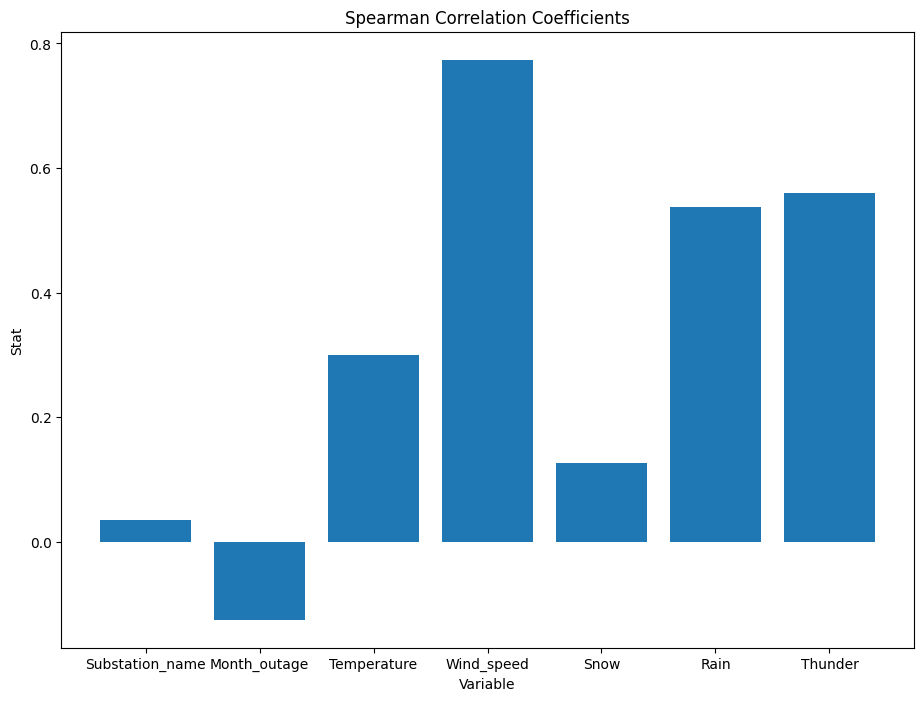

In [ ]:
# Значения коэффициентов stat и их названия
stats = [stat1, stat2, stat3, stat4, stat5,stat6,stat7 ]
labels = ['Substation_name','Month_outage','Temperature', 'Wind_speed', 'Snow', 'Rain', 'Thunder']

# Построение гистограммы
plt.figure(figsize=(11, 8))
plt.bar(labels, stats)
plt.title('Spearman Correlation Coefficients')
plt.xlabel('Variable')
plt.ylabel('Stat')
plt.show()

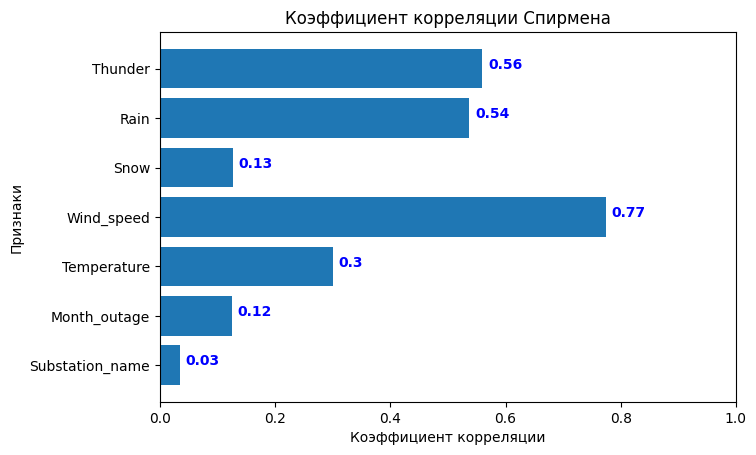

In [ ]:
# Значения коэффициентов stat и их названия
stats = [stat1, np.abs(stat2), stat3, stat4, stat5,stat6,stat7 ]
labels = ['Substation_name','Month_outage','Temperature', 'Wind_speed', 'Snow', 'Rain', 'Thunder']

# Построение гистограммы
fig, ax = plt.subplots()
ax.barh(labels, stats)
ax.set_title('Коэффициент корреляции Спирмена')
ax.set_xlabel('Коэффициент корреляции')
ax.set_ylabel('Признаки')
for i, v in enumerate(stats):
    ax.text(v + 0.01, i, str(round(v, 2)), color='blue', fontweight='bold')
# Расширение поля графика
ax.set_xlim(right=1)
plt.subplots_adjust(left=0.5, right=1.4)
plt.show()

ПОСТРОИМ ГИСТОГРАММЫ

Для проверки распределения данных в каждом из атрибутов можно использовать гистограммы и ядерные оценки плотности распределения. Например, для анализа распределения температуры можно использовать следующий код:

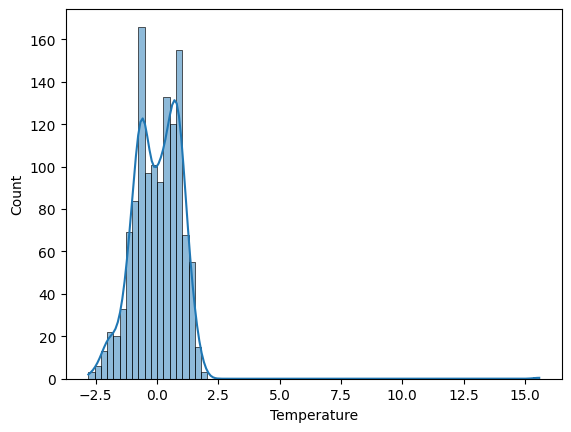

In [ ]:
# построение гистограммы температуры
sns.histplot(df['Temperature'], kde=True)
plt.show()

<ipython-input-263-8c11131f125d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Temperature'], shade=True)


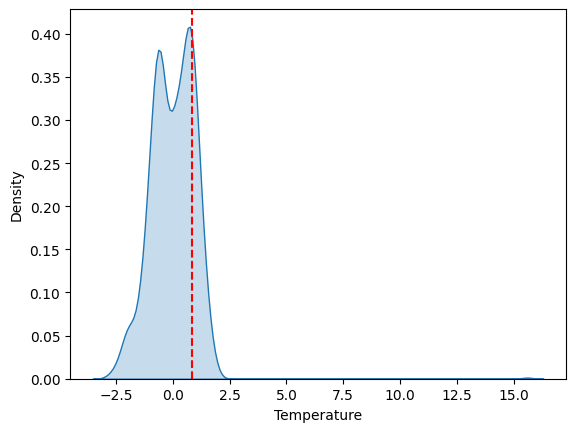

In [ ]:
# построение ядерной оценки плотности распределения с выделением моды
sns.kdeplot(df['Temperature'], shade=True)
plt.axvline(x=df['Temperature'].mode()[0], color='red', linestyle='--')
plt.show()

^Выделенная на графике красной линия показывает моду распределения. Если мода явно выражена, то это может быть признаком модального распределения. Таким образом, для анализа модального распределения необходимо провести анализ гистограммы и ядерной оценки плотности распределения, а также использовать статистические методы для определения моды.

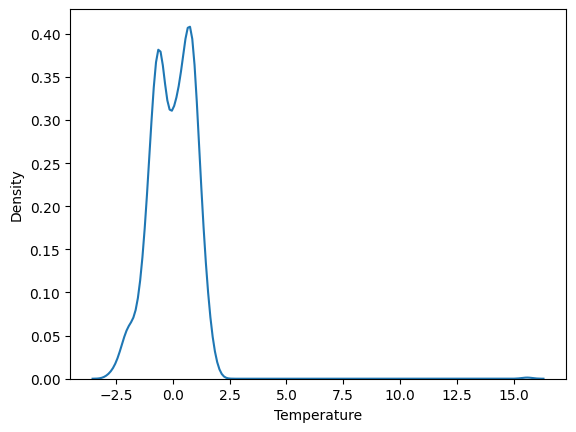

In [ ]:
sns.kdeplot(df['Temperature'])
plt.show()

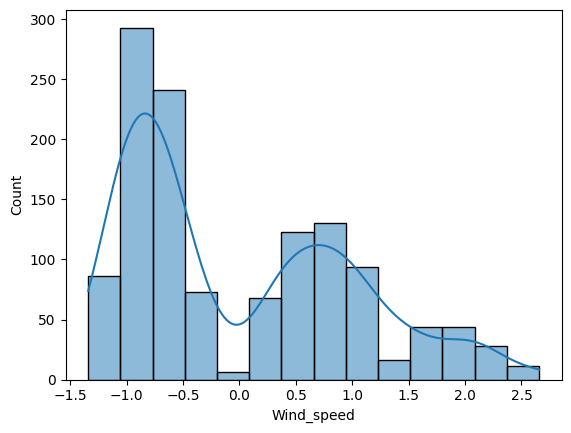

In [ ]:
# построение гистограммы
sns.histplot(df['Wind_speed'], kde=True)
plt.show()

<ipython-input-266-d8881b812eaf>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Wind_speed'], shade=True)


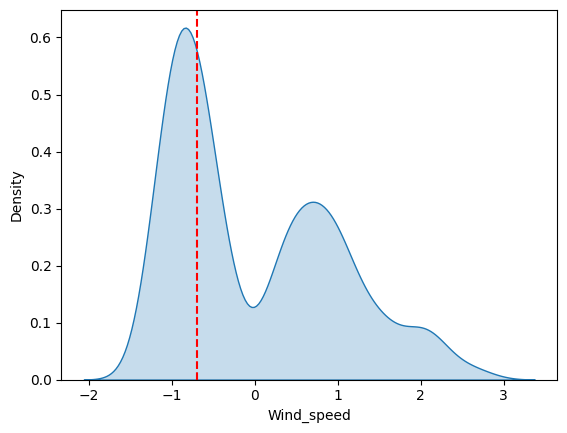

In [ ]:
# построение ядерной оценки плотности распределения с выделением моды
sns.kdeplot(df['Wind_speed'], shade=True)
plt.axvline(x=df['Wind_speed'].mode()[0], color='red', linestyle='--')
plt.show()

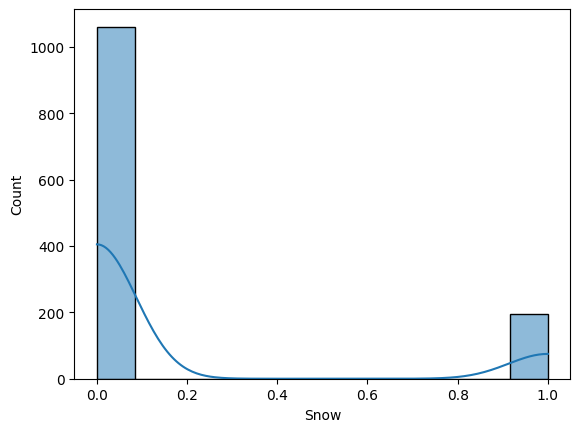

In [ ]:
# построение гистограммы
sns.histplot(df['Snow'], kde=True)
plt.show()

^ У булевых признаков распределение является биномиальным распределением, которое описывает случайные эксперименты с двумя исходами (в данном случае True или False). Однако, в данном конкретном случае, график не отображает вероятности, а показывает количество записей с каждым значением признака, поэтому не стоит говорить об определенном распределении.

In [ ]:
df.drop(['Volt', 'Num', 'Locality'], axis=1, inplace=True)

In [ ]:
df.reset_index(drop= True )

,Substation_name,Month_outage,Temperature,Wind_speed,Snow,Rain,Thunder,Outcome
0,40,11,-1.190485,-0.700839,0,0,0,0
1,23,11,-1.263736,-0.700839,0,0,0,0
2,40,11,-1.190485,-0.860693,1,0,0,1
3,23,11,-1.190485,-0.540985,1,0,0,1
4,19,11,-1.190485,-0.540985,1,0,0,1
...,...,...,...,...,...,...,...,...
1252,24,3,0.933787,0.258284,0,1,1,1
1253,7,3,0.860536,0.577992,0,1,1,1
1254,17,3,0.933787,0.258284,0,1,1,1
1255,13,3,0.933787,0.258284,0,1,1,1


In [ ]:
X = df.drop('Outcome', axis=1)
X.head()

,Substation_name,Month_outage,Temperature,Wind_speed,Snow,Rain,Thunder
0,40,11,-1.190485,-0.700839,0,0,0
1,23,11,-1.263736,-0.700839,0,0,0
2,40,11,-1.190485,-0.860693,1,0,0
3,23,11,-1.190485,-0.540985,1,0,0
4,19,11,-1.190485,-0.540985,1,0,0


In [ ]:
y = df['Outcome']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

**ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ**

In [ ]:
# 4. Обучение моделей
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [ ]:
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, lr_pred))
print('F1 score:', f1_score(y_test, lr_pred, average='weighted'))
#print('ROC-AUC score:', roc_auc_score(y_test, proba[:, 1]))
roc_auc = roc_auc_score(y_test, lr_pred)
print('ROC-AUC score:',roc_auc )

Logistic Regression:
Accuracy: 0.9576719576719577
F1 score: 0.9575636135042075
ROC-AUC score: 0.9564522908785205


**СЛУЧАЙНЫЙ ЛЕС**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
print(rf_pred)

[0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 1 1 0]


In [ ]:
# выводим вероятности прогнозов
probability = rf_model.predict_proba(X_test)
print(probability)

[[0.97 0.03]
 [0.07 0.93]
 [0.99 0.01]
 [0.08 0.92]
 [0.24 0.76]
 [0.   1.  ]
 [1.   0.  ]
 [0.82 0.18]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.89 0.11]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [1.   0.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.07 0.93]
 [1.   0.  ]
 [0.   1.  ]
 [0.91 0.09]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.98 0.02]
 [0.97 0.03]
 [0.   1.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [0.07 0.93]
 [1.   0.  ]
 [0.99 0.01]
 [0.05 0.95]
 [0.18 0.82]
 [0.   1.  ]
 [0.   1.  ]
 [0.03 0.97]
 [0.96 0.04]
 [1.   0.  ]
 [0.97 0.03]
 [0.99 0.01]
 [0.01 0.99]
 [0.   1.  ]
 [0.63 0.37]
 [0.99 0.01]
 [0.   1.  ]
 [0.99 0.01]
 [0.93 0.07]
 [0.14 0.86]
 [0.86 0.14]
 [0.97 0.03]
 [0.07 0.93]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [0.   1.  ]
 [0.9  0.1 ]
 [0.99 0.01]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.01 0.99]
 [0.97 0.03]
 [0.   1.  ]
 [0.53 0.47]
 [1.   0.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.98 0.02]
 [0.06 0.94]
 [0.1  0.9 ]
 [0.98 0.02]
 [0.06 0.94]

In [ ]:
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, rf_pred))
print('F1 score:', f1_score(y_test, rf_pred, average='weighted'))
roc_auc = roc_auc_score(y_test, rf_pred)
print('ROC-AUC score:', roc_auc)

Random Forest Classifier:
Accuracy: 0.9814814814814815
F1 score: 0.9814642003201043
ROC-AUC score: 0.9808743169398907


In [ ]:
# 7. Тестирование модели на новых данных
#new_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.9, 4.3, 1.3], [7.3, 2.8, 6.3, 1.8]])
#new_data_scaled = final_scaler.transform(new_data)
#predictions = final_model.predict(new_data_scaled)
#print(predictions)

**РЕШАЮЩЕЕ ДЕРЕВО**







In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
tree_pred = tree_model.predict(X_test)

In [ ]:
print(tree_pred)

[0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 0]


In [ ]:
tree_prob = tree_model.predict_proba(X_test)[:, 1]
print("Predicted probabilities:", tree_prob)

Predicted probabilities: [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0

In [ ]:
# выводим вероятности прогнозов
probability_tree = tree_model.predict_proba(X_test)
print(probability_tree)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 

In [ ]:
roc_auc = roc_auc_score(y_test, tree_pred)
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, tree_pred))
print('F1 score:', f1_score(y_test, tree_pred, average='weighted'))
print("ROC-AUC score:", roc_auc)

Random Forest Classifier:
Accuracy: 0.9497354497354498
F1 score: 0.9497449533373149
ROC-AUC score: 0.949936948297604


**ГРАДИЕНТНЫЙ БУСТИНГ**

In [ ]:
# обучение модели градиентного бустинга
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
gradient_pred = gb_model.predict(X_test)

In [ ]:
print(gradient_pred)

[0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 1 1 0]


In [ ]:
# предсказание вероятностей и округление до двух знаков после запятой
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
y_pred_proba_rounded = np.round(y_pred_proba, 2)

In [ ]:
# вывод результатов
print("Predicted probabilities:", y_pred_proba_rounded)

Predicted probabilities: [0.   0.99 0.02 0.65 0.98 0.99 0.   0.01 0.   0.   0.99 0.01 0.06 1.
 0.04 1.   0.01 0.02 1.   0.99 0.01 1.   0.12 0.01 1.   0.05 1.   0.1
 0.04 0.98 0.01 0.11 0.01 1.   0.   0.   0.95 0.92 0.99 0.99 0.99 0.03
 0.02 0.01 0.01 1.   0.99 0.22 0.01 1.   0.01 0.08 0.97 0.45 0.   1.
 1.   0.97 0.99 0.99 0.03 0.02 1.   1.   1.   1.   0.06 1.   0.38 0.01
 0.05 1.   0.   0.99 0.99 0.01 0.97 0.01 1.   0.04 1.   0.   1.   0.93
 0.99 0.18 0.66 0.99 0.14 1.   0.   0.97 0.01 0.99 0.03 0.03 0.   1.
 1.   0.98 0.99 0.03 1.   0.03 0.   1.   0.01 0.99 0.02 1.   0.03 1.
 0.   1.   0.03 0.97 1.   0.07 0.97 0.97 1.   1.   0.01 1.   0.   0.03
 0.99 0.99 0.01 1.   0.04 0.01 0.02 0.01 1.   0.02 0.09 0.03 0.01 0.01
 0.04 0.   1.   0.01 0.29 0.02 1.   1.   1.   0.98 0.02 0.01 0.   0.99
 0.99 0.05 0.01 1.   0.98 1.   0.03 0.01 0.99 0.4  0.56 1.   0.01 0.05
 1.   0.97 1.   1.   0.99 0.01 0.01 0.01 0.15 1.   1.   0.05 0.05 1.
 0.24 0.11 0.99 0.99 0.2  0.87 0.12 0.99 1.   0.   0.25 0.   0.

In [ ]:
roc_auc = roc_auc_score(y_test, gradient_pred)
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, gradient_pred))
print('F1 score:', f1_score(y_test, gradient_pred, average='weighted'))
print("ROC-AUC score:", roc_auc)

Random Forest Classifier:
Accuracy: 0.9708994708994709
F1 score: 0.9708821242535608
ROC-AUC score: 0.9704497688104246


**НЕЙРОННЫЕ СЕТИ**

In [ ]:
# масштабирование числовых признаков
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
num_features = ['Temperature', 'Wind_speed']
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
# обучение модели нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

^В этом коде мы загружаем данные из файла electricity.csv, преобразуем категориальные признаки в числовые и масштабируем числовые признаки, разделяем данные на обучающую и тестовую выборки, обучаем модель нейронной сети на обучающей выборке, предсказываем вероятности принадлежности объектов тестовой выборки к положительному классу и округляем их до двух знаков после запятой. Мы использовали параметры hidden_layer_sizes=(10, 5) и max_iter=1000 для настройки модели нейронной сети, но эти значения могут быть изменены в зависимости от конкретной задачи.

In [ ]:
print(mlp_pred)

[0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 0]


In [ ]:
# предсказание вероятностей и округление до двух знаков после запятой
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
y_pred_proba_rounded = np.round(y_pred_proba, 2)
# вывод результатов
print("Predicted probabilities:", y_pred_proba_rounded)

Predicted probabilities: [0.05 1.   0.01 0.11 0.99 1.   0.02 0.04 0.02 0.04 1.   0.01 0.06 1.
 0.09 1.   0.   0.04 0.99 1.   0.02 1.   0.05 0.   1.   0.06 1.   0.05
 0.12 1.   0.01 0.51 0.   0.57 0.   0.   0.99 0.81 0.99 0.99 1.   0.01
 0.05 0.04 0.   1.   1.   0.08 0.   1.   0.01 0.05 0.83 0.32 0.04 0.98
 1.   0.96 1.   1.   0.01 0.   1.   1.   0.99 1.   0.06 1.   0.11 0.01
 0.08 1.   0.02 0.99 0.94 0.   0.95 0.04 1.   0.12 1.   0.   1.   0.99
 0.97 0.04 0.94 0.98 0.17 1.   0.   0.99 0.02 1.   0.01 0.01 0.   1.
 1.   0.99 1.   0.06 0.68 0.01 0.   1.   0.17 1.   0.07 1.   0.01 1.
 0.09 0.99 0.09 0.88 1.   0.28 0.93 0.99 1.   1.   0.06 1.   0.01 0.02
 0.96 1.   0.   1.   0.07 0.01 0.05 0.   1.   0.11 0.04 0.08 0.17 0.02
 0.02 0.   1.   0.01 0.25 0.06 1.   1.   1.   1.   0.01 0.01 0.   0.97
 0.99 0.21 0.   1.   0.93 1.   0.01 0.   1.   0.22 0.03 1.   0.01 0.21
 1.   0.87 1.   1.   1.   0.01 0.01 0.   0.03 1.   1.   0.08 0.01 1.
 0.02 0.51 0.98 0.96 0.14 1.   0.1  1.   1.   0.09 0.14 0.  

In [ ]:
roc_auc = roc_auc_score(y_test, mlp_pred)
print('MLPClassifier:')
print('Accuracy:', accuracy_score(y_test, mlp_pred))
print('F1 score:', f1_score(y_test, mlp_pred, average='weighted'))
print("ROC-AUC score:", roc_auc)

MLPClassifier:
Accuracy: 0.9576719576719577
F1 score: 0.957624426112116
ROC-AUC score: 0.9569567044976881


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#ЛИНЕЙНОЕ ЯДРО
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model_lin = svm.SVC(kernel='linear',C=0.025)
model_lin.fit(X_train, y_train)

SVC(C=0.025, kernel='linear')

In [ ]:
print(model_lin.score(X_train,y_train))
print(model_lin.score(X_test,y_test))

0.9647326507394767
0.9523809523809523


In [ ]:
#ПОЛИНОМИАЛЬНОЕ ЯДРО
model_poly= svm.SVC(kernel='poly', C=0.025)
model_poly.fit(X_train, y_train)
print(model_poly.score(X_train,y_train))
print(model_poly.score(X_test,y_test))

0.5631399317406144
0.5185185185185185


In [ ]:
# ГАУССОВО ЯДРО
model_rbf= svm.SVC(kernel='rbf', gamma=2, C=1)
model_rbf.fit(X_train, y_train)
print(model_rbf.score(X_train,y_train))
print(model_rbf.score(X_test,y_test))

0.9977246871444824
0.9153439153439153


In [ ]:
model_rbf_pred = model_rbf.predict(X_test)

In [ ]:
model_rbf_accuracy=accuracy_score(y_test,model_rbf_pred)

In [ ]:
print(model_rbf_accuracy)

0.9153439153439153


In [ ]:
#линейное ядро-оценка точности

In [ ]:
model_lin_pred=model_lin.predict(X_test)
model_lin_accuracy=accuracy_score(y_test,model_lin_pred)

In [ ]:
model_lin_f1=f1_score(y_test,model_lin_pred,average='weighted')

In [ ]:
model_lin_auc=roc_auc_score(y_test,model_lin_pred,average='weighted')

In [ ]:
print("accuracy = ",model_lin_accuracy)
print("f1-score = ",model_lin_f1)
print("auc = ",model_lin_auc)

accuracy =  0.9523809523809523
f1-score =  0.9522308233638282
auc =  0.9509878100042035


In [ ]:
lr_acc=accuracy_score(y_test, lr_pred)
rfc_acc=accuracy_score(y_test, rf_pred)
dtc_acc=accuracy_score(y_test, tree_pred)
gbc_acc=accuracy_score(y_test, gradient_pred)
mlp_acc=accuracy_score(y_test, mlp_pred)
svm_acc=accuracy_score(y_test,model_lin_pred)

In [ ]:
lr_f1=f1_score(y_test, lr_pred,average='weighted')
rfc_f1=f1_score(y_test, rf_pred,average='weighted')
dtc_f1=f1_score(y_test, tree_pred,average='weighted')
gbc_f1=f1_score(y_test, gradient_pred,average='weighted')
mlp_f1=f1_score(y_test, mlp_pred,average='weighted')
svm_f1=f1_score(y_test,model_lin_pred,average='weighted')

In [ ]:
model_lin_auc=roc_auc_score(y_test,model_lin_pred,average='weighted')

In [ ]:
print("lr_acc=",lr_acc)
print("rfc_acc=",rfc_acc)
print("dtc_acc=",dtc_acc)
print("gbc_acc=",gbc_acc)
print("mlp_acc=",mlp_acc)
print("svm_acc=",svm_acc)

lr_acc= 0.9576719576719577
rfc_acc= 0.9814814814814815
dtc_acc= 0.9497354497354498
gbc_acc= 0.9708994708994709
mlp_acc= 0.9576719576719577
svm_acc= 0.9523809523809523


In [ ]:
print("lr_f1=",lr_f1)
print("rfc_f1=",rfc_f1)
print("dtc_f1=",dtc_f1)
print("gbc_f1=",gbc_f1)
print("mlp_f1=",mlp_f1)
print("svm_f1=",svm_f1)

lr_f1= 0.9575636135042075
rfc_f1= 0.9814642003201043
dtc_f1= 0.9497449533373149
gbc_f1= 0.9708821242535608
mlp_f1= 0.957624426112116
svm_f1= 0.9522308233638282


In [ ]:
lr_auc=roc_auc_score(y_test, lr_pred,average='weighted')
rfc_auc=roc_auc_score(y_test, rf_pred,average='weighted')
dtc_auc=roc_auc_score(y_test, tree_pred,average='weighted')
gbc_auc=roc_auc_score(y_test, gradient_pred,average='weighted')
mlp_auc=roc_auc_score(y_test, mlp_pred,average='weighted')
svm_auc=roc_auc_score(y_test,model_lin_pred,average='weighted')

In [ ]:
print("lr_auc=",lr_auc)
print("rfc_auc=",rfc_auc)
print("dtc_auc=",dtc_auc)
print("gbc_auc=",gbc_auc)
print("mlp_auc=",mlp_auc)
print("svm_auc=",svm_auc)

lr_auc= 0.9564522908785205
rfc_auc= 0.9808743169398907
dtc_auc= 0.949936948297604
gbc_auc= 0.9704497688104246
mlp_auc= 0.9569567044976881
svm_auc= 0.9509878100042035


In [ ]:
best_model = max(rfc_acc, dtc_acc, lr_acc, mlp_acc, gbc_acc,svm_acc)
if best_model == rfc_acc:
    print("The best model is Random Forest Classifier")
    final_model = rf_model
elif best_model == lr_acc:
    print("The best model is Logistic Regression")
    final_model = lr_model
elif best_model == dtc_acc:
    print("The best model is Decision Tree Classifier")
    final_model = tree_model
elif best_model == mlp_acc:
    print("The best model is MLP Classifier")
    final_model = mlp_model
elif best_model == gbc_acc:
    print("The best model is Gradient Boosting Classifier")
    final_model = gb_model
else:
    print("The best model is SVM linear kernel")
    final_model = model_lin

final_model.fit(X, y)

The best model is Random Forest Classifier


RandomForestClassifier()

СОХРАНЕНИЕ И ЗАГРУЗКА МОДЕЛИ

In [ ]:
from joblib import dump
import pickle
# сохранение модели
with open('trained_model.pkl','wb') as f:
  pickle.dump(rf_model, f)

In [ ]:
#загрузка модели
from joblib import load

# загрузка модели
#model = load('trained_model.pkl')
with open('trained_model.pkl','rb') as f:
  model=pickle.load(f)

ЭКСПЕРИМЕНТ НА НОВЫХ ДАННЫХ

In [ ]:
new_data = pd.read_csv('newdata.csv',sep=';')

In [ ]:
new_data.head()

,Substation_name,Month_outage,Temperature,Wind_speed,Snow,Rain,Thunder
0,Камское Устье,январь,-5,14,1,0,0
1,Свияжск,январь,-10,4,0,0,0
2,Апастово,май,10,13,0,1,0
3,Караталга,июнь,20,1,0,0,0
4,Верхний Услон,июнь,14,17,0,1,0


In [ ]:
# загрузка обученной модели
#model = RandomForestClassifier()

In [ ]:
new_data["Substation_name"] = new_data["Substation_name"].replace(mapping_dict_sub)

In [ ]:
new_data["Month_outage"] = new_data["Month_outage"].replace(mapping_dict_month)

In [ ]:
new_data.head()

,Substation_name,Month_outage,Temperature,Wind_speed,Snow,Rain,Thunder
0,39,11,-5,14,1,0,0
1,27,11,-10,4,0,0,0
2,40,11,10,13,0,1,0
3,35,11,20,1,0,0,0
4,21,11,14,17,0,1,0


In [ ]:
# масштабирование числовых признаков
scaler = StandardScaler()
num_features1 = ['Temperature', 'Wind_speed']
new_data[num_features1] = scaler.fit_transform(new_data[num_features1])

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Substation_name  5 non-null      int64  
 1   Month_outage     5 non-null      int64  
 2   Temperature      5 non-null      float64
 3   Wind_speed       5 non-null      float64
 4   Snow             5 non-null      int64  
 5   Rain             5 non-null      int64  
 6   Thunder          5 non-null      int64  
dtypes: float64(2), int64(5)
memory usage: 408.0 bytes


In [ ]:
# извлечение признаков из новых данных
X_new = new_data[['Substation_name','Month_outage','Temperature', 'Wind_speed', 'Snow', 'Rain', 'Thunder']]

In [ ]:
# прогнозирование на новых данных
y_pred = model.predict(X_new)

In [ ]:
print(y_pred)

[1 0 1 0 1]


In [ ]:
accuracy = model.score(X_new, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [ ]:
# предсказание вероятностей и округление до двух знаков после запятой
y_pred_proba =model.predict_proba(X_new)[:, 1]
y_pred_proba_rounded = np.round(y_pred_proba, 2)
# вывод результатов
print("Predicted probabilities:", y_pred_proba_rounded)

Predicted probabilities: [0.99 0.   0.95 0.32 0.98]
